In [13]:
import numpy as np
import sklearn
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import pandas as pd
import gzip
import shutil



In [3]:
dat1 = np.genfromtxt("docword.enron.txt.gz", delimiter = "", skip_header= 3, dtype = int)


In [4]:
datdf = pd.DataFrame(dat1,columns = ["DocID","WordID","NNZ"])
datdf

# dnew = np.array(dnew)

,DocID,WordID,NNZ
0,1,118,1
1,1,285,1
2,1,1229,1
3,1,1688,1
4,1,2068,1
...,...,...,...
3710415,39861,18448,1
3710416,39861,18848,1
3710417,39861,23449,1
3710418,39861,25721,1


In [26]:
enron = datdf.groupby('NNZ', group_keys=False).apply(lambda x: x.sample(frac=0.002))
enron_sparse = enron.pivot_table(index = "DocID",columns = "WordID",fill_value = 0)


In [27]:
enron_mat = np.array(enron_sparse)
enron_mat.shape


(5474, 3995)

In [29]:
jm = pairwise_distances(enron_mat, metric='jaccard')
js = 1 - jm
js


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [44]:
js = 1 - jm
dfra = pd.DataFrame(js)
dfra




,0,1,2,3,4,5,6,7,8,9,...,5464,5465,5466,5467,5468,5469,5470,5471,5472,5473
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


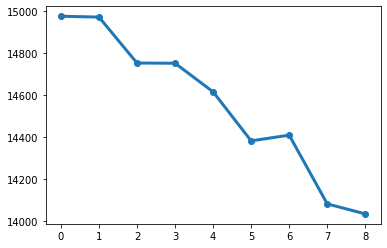

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
arr = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i,algorithm = "full",random_state=0).fit(js)
  arr.append(kmeans.inertia_)
plt.plot(arr,linewidth = 3,marker = 'o')
plt.show()




In [48]:
from sklearn.decomposition import PCA
centroids = KMeans(n_clusters=6,algorithm = "full",random_state=0,max_iter = 60).fit(js).cluster_centers_


In [49]:
centroids



array([[ 1.84467810e-04,  6.91754289e-04,  7.37871241e-04, ...,
         1.84467810e-04,  1.84467810e-04,  8.30105147e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.71050543e-20,  1.08420217e-19, -1.08420217e-19, ...,
        -2.71050543e-20, -2.71050543e-20,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


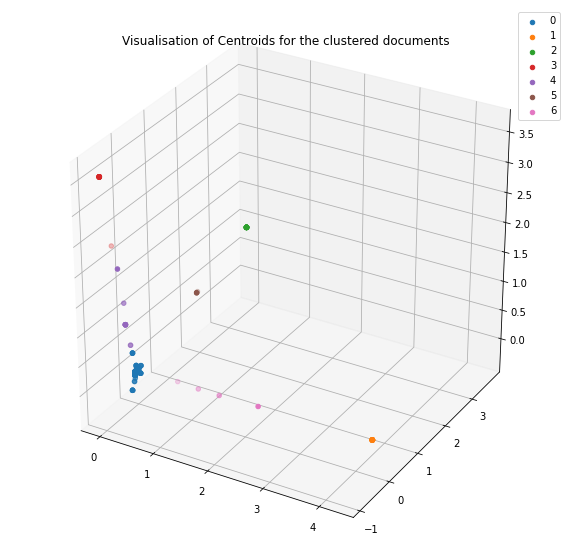

In [50]:
from sklearn.decomposition import PCA
#Centroids Visualisation
pca = PCA(3)
data = pca.fit_transform(js)
data.shape
model = KMeans(n_clusters = 7, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
aax = plt.axes(projection ="3d")
for i in uniq:
   aax.scatter(data[label == i , 0] , data[label == i , 1] ,data[label == i,2],label = i)
plt.scatter(centroids[:,0], centroids[:,1],centroids[:,2], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.title("Visualisation of Centroids for the clustered documents")

plt.legend()
plt.show()

In [52]:
from sklearn.metrics import davies_bouldin_score
dav = KMeans(n_clusters=7,algorithm = "full",random_state=0,max_iter = 60).fit(js)
davies_bouldin_score(js,labels = dav.fit_predict(js))



1.0692346774105308

In [53]:
import time
t1 = time.perf_counter()
dav = KMeans(n_clusters=7,algorithm = "full",random_state=0,max_iter = 60).fit(js)
tw = time.perf_counter() - t1
print(tw, "seconds")

7.957661323999673 seconds


In [55]:
from memory_profiler import profile
%load_ext memory_profiler

%memit dav=KMeans(n_clusters=5,random_state=42).fit(js)

peak memory: 11608.60 MiB, increment: -5.88 MiB
